In [35]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [36]:
path = ''

filename = 'data/output_populations_2-1000-s-l.csv'
filename2 = 'data/output_pops_E.csv'
st = 300
ed = 800

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2})

print(df.head(10))

iteration  species_1  species_2
300        301      60896      11915
301        302      60898      12013
302        303      60865      12119
303        304      60798      12199
304        305      60738      12280
305        306      60679      12345
306        307      60588      12415
307        308      60494      12462
308        309      60415      12524
309        310      60348      12572


In [37]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(df['species_2'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.929583
p-Value                   0.001828
#Lags used               11.000000
Observ used             488.000000
Critical Value (1%)      -3.443821
Critical Value (5%)      -2.867481
Critical Value (10%)     -2.569934
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=134.0316, p=0.0000  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=134.8423, p=0.0000  , df=1
likelihood ratio test: chi2=119.3579, p=0.0000  , df=1
parameter F test:         F=134.0316, p=0.0000  , df_denom=496, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=59.3550 , p=0.0000  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=59.7140 , p=0.0000  , df=1
likelihood ratio test: chi2=56.4028 , p=0.0000  , df=1
parameter F test:         F=59.3550 , p=0.0000  , df_denom=496, df_num=1


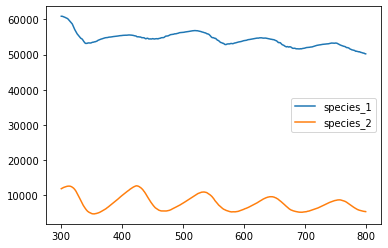

In [38]:
maxlag = [1]
def GCT(dataframe):
    print('\n\n1 eats 2?')
    grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag)
    print('\n\n2 eats 1?')
    grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_2']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2
0   3.407794   1.829631
1   3.408825   1.874057
2   3.391812   1.922110
3   3.357270   1.958377
4   3.326336   1.995097
5   3.295919   2.024563
6   3.249003   2.056296
7   3.200541   2.077603
8   3.159812   2.105709
9   3.125270   2.127469


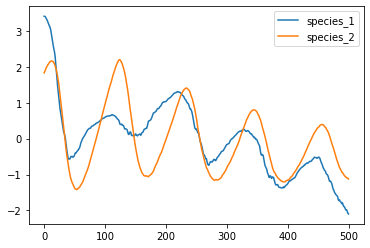

In [39]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2']].plot()

species_1  species_2
300  11.016923   9.385553
301  11.016956   9.393745
302  11.016414   9.402530
303  11.015312   9.409109
304  11.014325   9.415727
305  11.013353   9.421006
306  11.011852   9.426661
307  11.010299   9.430439
308  11.008993   9.435402
309  11.007883   9.439227


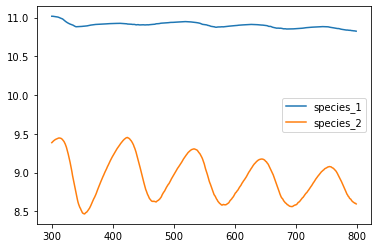

In [46]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2']].plot()

In [40]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.662642
p-Value                   0.004670
#Lags used                6.000000
Observ used             493.000000
Critical Value (1%)      -3.443684
Critical Value (5%)      -2.867420
Critical Value (10%)     -2.569902
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=134.0316, p=0.0000  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=134.8423, p=0.0000  , df=1
likelihood ratio test: chi2=119.3579, p=0.0000  , df=1
parameter F test:         F=134.0316, p=0.0000  , df_denom=496, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=59.3550 , p=0.0000  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=59.7140 , p=0.0000  , df=1
likelihood ratio test: chi2=56.4028 , p=0.0000  , df=1
parameter F test:         F=59.3550 , p=0.0000  , df_denom=496, df_num=1


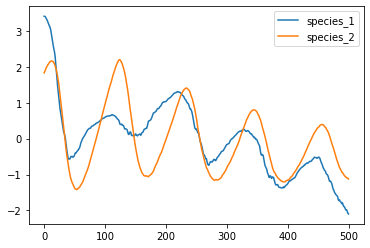

In [41]:
GCT(scaled_df)

species_1  species_2
0    3.407794   1.829631
10   3.078870   2.148775
20   1.912684   1.909417
30   0.386640   0.617426
40  -0.571778  -0.787898
50  -0.441342  -1.380401
60  -0.125307  -1.300161
70   0.201555  -0.910297
80   0.356222  -0.330941
90   0.472222   0.297375


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.6599 , p=0.0000  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=27.3333 , p=0.0000  , df=1
likelihood ratio test: chi2=21.7212 , p=0.0000  , df=1
parameter F test:         F=25.6599 , p=0.0000  , df_denom=46, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0829  , p=0.0066  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=8.6101  , p=0.0033  , df=1
likelihood ratio test: chi2=7.9320  , p=0.0049  , df=1
parameter F test:         F=8.0829  , p=0.0066  , df_denom=46, df_num=1


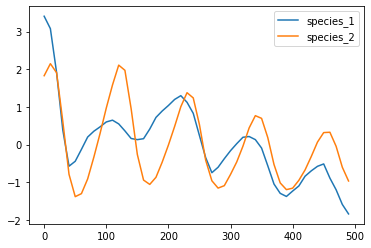

In [42]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2
0     3.407794   1.829631
50   -0.441342  -1.380401
100   0.602142   0.971930
150   0.132986  -0.261128
200   1.038302  -0.012250
250   0.239706   0.529026
300  -0.160365  -0.791071
350  -0.090765   0.697665
400  -1.232204  -1.155549
450  -0.511973   0.320041


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3339  , p=0.1774  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=3.5009  , p=0.0613  , df=1
likelihood ratio test: chi2=2.9572  , p=0.0855  , df=1
parameter F test:         F=2.3339  , p=0.1774  , df_denom=6, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7972  , p=0.2286  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=2.6958  , p=0.1006  , df=1
likelihood ratio test: chi2=2.3580  , p=0.1246  , df=1
parameter F test:         F=1.7972  , p=0.2286  , df_denom=6, df_num=1


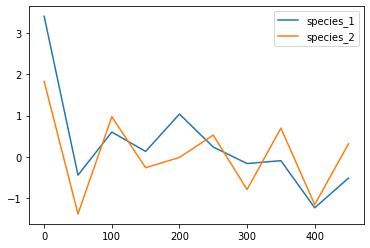

In [43]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)